# Exploração e análise de dados de crédito com SQL
Esse notebook faz parte do curso SQL para análise de dados da EBAC.

Os dados:
Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

idade = idade do cliente<br>
sexo = sexo do cliente (F ou M)<br>
dependentes = número de dependentes do cliente<br>
escolaridade = nível de escolaridade do clientes<br>
salario_anual = faixa salarial do cliente<br>
tipo_cartao = tipo de cartao do cliente<br>
qtd_produtos = quantidade de produtos comprados nos últimos 12 meses<br>
iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses<br>
meses_inativo_12m = quantidade de meses que o cliente ficou inativo<br>
limite_credito = limite de credito do cliente<br>
valor_transacoes_12m = valor das transações dos ultimos 12 meses<br>
qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses<br>
A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos<br> dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

**O conjunto de dados**

(https://raw.githubusercontent.com/rhatiro/exercicios-SQL-para-Analise-de-Dados-EBAC/main/Mo%CC%81dulo%208%20-%20Projeto%20Final/database/credito8.csv) utilizado neste projeto consiste em uma subamostra do [dataset original](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv) do professor [André Perez](https://www.linkedin.com/in/andremarcosperez/). É importante destacar que pode haver discrepâncias nas proporções das categorias nesta amostra parcial em relação ao conjunto de dados original. Essa subamostra foi extraída com o objetivo de facilitar o processamento dos dados para o projeto em questão. Para acessar o dataset completo, você pode visitar o repositório GitHub do professor [André Perez](https://github.com/andre-marcos-perez), disponível através do seguinte link: https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv

É válido ressaltar que as estimativas baseadas nesse conjunto de dados podem apresentar menor precisão em comparação com a amostra completa. Portanto, os resultados aqui apresentados não possuem a mesma fidelidade de uma análise realizada com o dataset completo. Eles são utilizados apenas para fins didáticos do curso e para demonstração pessoal no portfólio. No entanto, todas as *queries* podem ser igualmente aplicadas ao conjunto de dados original para obter conclusões confiáveis e úteis em análises mais aprofundadas.

Os dados fornecem informações sobre clientes de um banco e incluem as seguintes variáveis:

#  **Preview da tabela**

**Query_01**

SELECT * FROM "default"."credito" limit 10;
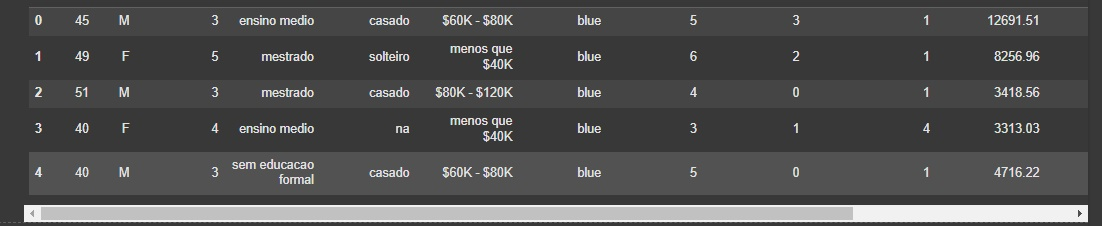

>Podemos analisar os dados em busca de valores nulos (NA) e ver quantos existem em cada coluna da tabela. Isso ajuda a entender onde faltam informações, o que é útil para planejar como lidar com esses valores ausentes, seja preenchendo, removendo ou tratando de outra forma.

# Quantidade de linhas no dataset

**Query_2**

SELECT COUNT(*) AS quantidade_linhas
FROM credito;

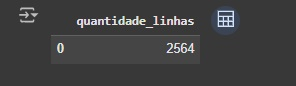

O conjunto de dados completo possui 10.127 linhas, enquanto esta amostra contém 2.564 linhas, representando aproximadamente 25% do dataset original.



# Tipos de dados em cada coluna

Query 3

DESCRIBE credito;

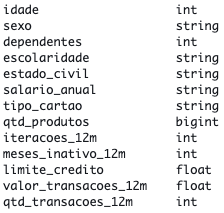

> Os tipos dos dados no *dataset* podem ser descritos como:
> - `int` representa dados do tipo inteiro (numérico);
> - `string` representa dados do tipo texto ou cadeia de caracteres;
> - `bigint` representa dados do tipo inteiro longo (um número inteiro maior do que o tipo int);
> - `float` representa dados do tipo número de ponto flutuante (um número com parte fracionária).

# Categorias da variável `escolaridade`

Query 4

SELECT DISTINCT escolaridade
FROM credito;

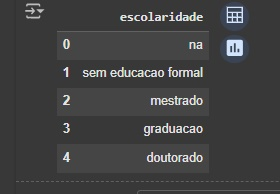

> Podemos notar que há valores **nulos/ausentes** na variável categórica `escolaridade`, representados pelo valor **`na`**.

# Categorias da variável `estado_civil`

**Query 5**

SELECT DISTINCT estado_civil
FROM credito;

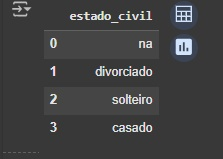

> Também podemos notar a presença de valores nulos na variável categórica `estado_civil`.

# Categorias da variável `sexo`

**Query 6**

SELECT DISTINCT sexo
FROM credito;

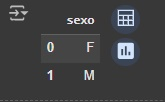

> Diferente das demais colunas, não há valores nulos na variável categórica `sexo`.

# Quantidade de clientes em cada faixa salarial

**Query 7**

SELECT salario_anual,
    COUNT(*) AS quantidade
FROM credito
GROUP BY salario_anual
ORDER BY CASE
        salario_anual
        WHEN 'menos que $40K' THEN 1
        WHEN '$40K - $60K' THEN 2
        WHEN '$60K - $80K' THEN 3
        WHEN '$80K - $120K' THEN 4
        WHEN '$120K +' THEN 5 ELSE 6
    END;

  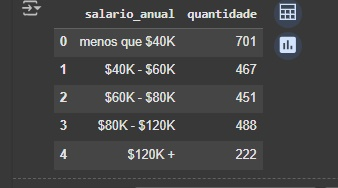

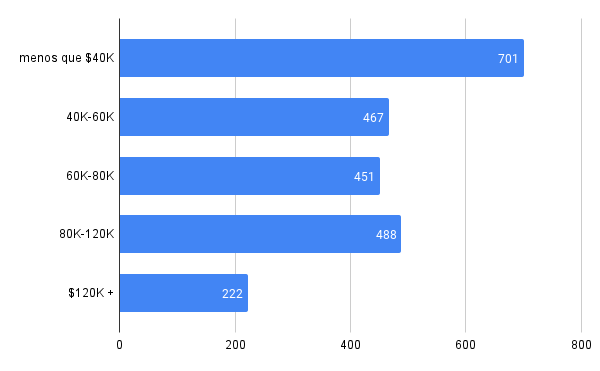

> Ao desconsiderar a presença dos 235 valores nulos na variável `salario_anual`, podemos observar que a maioria dos clientes recebem anualmente a quantia abaixo de \\$40.000,00 e a minoria acima de \\$120.000,00.

# Quantidade de clientes de acordo com cada tipo de cartão

# Query 8

SELECT tipo_cartao,
    COUNT(*) AS quantidade
FROM credito
GROUP BY tipo_cartao
ORDER BY quantidade DESC;

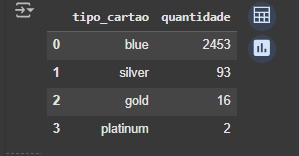

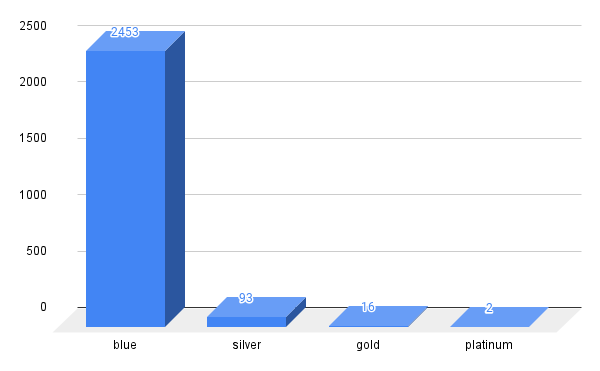

A maioria possui o tipo de cartão blue, dando a entender que supostamente façam parte dos clientes com faixa de salário anual de menor valor.

# Quantidade de clientes de acordo com o sexo

**Query 9**

SELECT sexo,
    COUNT(*) AS quantidade
FROM credito
GROUP BY sexo
ORDER BY quantidade DESC;

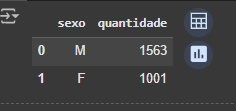

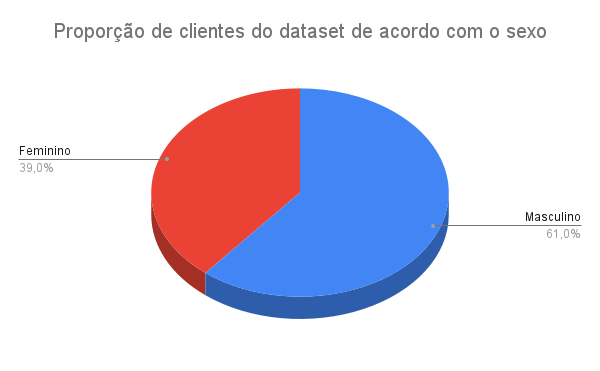

> Neste conjunto de dados, a proporção de clientes do sexo masculino e feminino não está equilibrada. Portanto é algo que deve ser levado em consideração ao relacionar esta variável com as demais.

# Análise da idade dos clientes (média, mínima e máxima)

**Query 10**

SELECT ROUND(AVG(idade)) AS idade_media,
    MIN(idade) AS idade_minima,
    MAX(idade) AS idade_maxima
FROM credito;

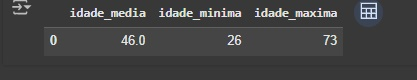

>Idade Média (idade_media): O valor é 46 anos, indicando que a média das idades na amostra é de 46 anos. Este valor sugere que a maioria dos indivíduos possui uma idade em torno dessa faixa.


# Análise dos gastos dos clientes (média, mínima e máxima)

**Query 11**

SELECT ROUND(AVG(valor_transacoes_12m), 2) AS valor_medio_transacoes,
    MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
    MAX(valor_transacoes_12m) AS valor_maximo_transacoes
FROM credito;

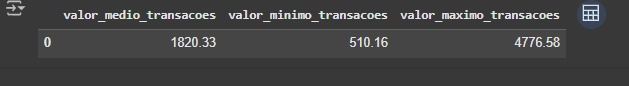

>O valor médio das transações é de 1820,33. Isso indica que, em média, cada transação realizada tem um valor em torno de 1820,33. Este valor médio ajuda a entender o comportamento geral dos gastos ou valores transacionados pelos indivíduos.

# Limite mínimo de crédito de acordo com o tipo de cartão, sexo e escolaridade

**Query 12**

SELECT COUNT(*) as quantidade,
    MIN(limite_credito) AS limite_credito_maximo,
    tipo_cartao,
    sexo,
    escolaridade
FROM credito
WHERE escolaridade != 'na'
GROUP BY sexo,
    escolaridade,
    tipo_cartao
ORDER BY limite_credito_maximo ASC;

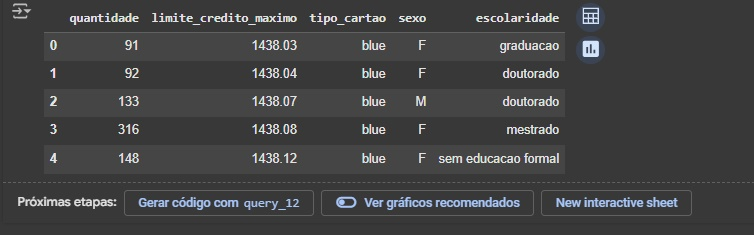



# Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade

**query 13**

SELECT COUNT(*) as quantidade,
    MAX(limite_credito) AS limite_credito_maximo,
    tipo_cartao,
    sexo,
    escolaridade
FROM credito
WHERE escolaridade != 'na'
GROUP BY sexo,
    escolaridade,
    tipo_cartao
ORDER BY limite_credito_maximo DESC;

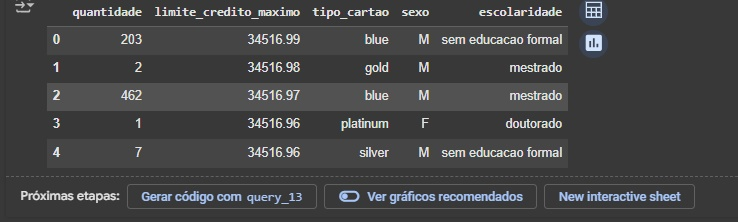

>É possível observar que não há uma relação considerável da variável `escolaridade` com o limite de crédito dos clientes. Os resultados dos limites mínimos de acordo com as separações categóricas demonstram que o tipo de cartão *blue* representa a maior parte dos limites mais baixos enquanto os demais representam os mais altos.

A variável `sexo` demonstra que clientes do sexo masculino possuem limites máximos de crédito mais altos enquanto clientes do sexo feminino possuem limites máximos de crédito mais baixos.

# Análise da quantidade e valores das transações de acordo com o sexo e estado civil

**Query 14**

SELECT COUNT(*) AS quantidade,
    sexo,
    estado_civil,
    MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
    MAX(valor_transacoes_12m) AS valor_maximo_transacoes,
    AVG(valor_transacoes_12m) AS valor_medio_transacoes
FROM credito
WHERE estado_civil != 'na'
GROUP BY sexo,
    estado_civil
ORDER BY quantidade ASC;

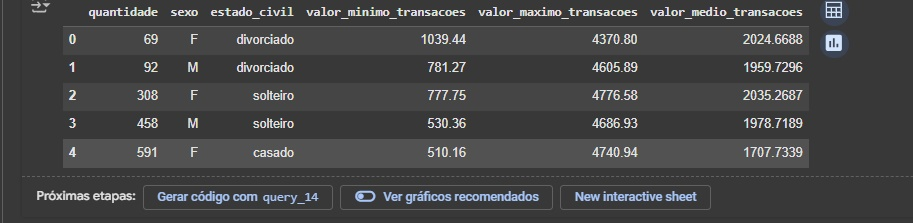

> Nesta análise podemos notar que a quantidade de transações tem uma relação considerável com a variável `estado_civil`, sendo que a maior parte foi efetuada por clientes casados e a menor parte por clientes divorciados. Em contrapartida, a média de valor das transações também se diferencia de acordo com o estado civil mas de forma contrária, na qual a média mais alta são dos clientes divorciados e a média mais baixa são dos clientes casados, assim como pode ser constatado na relação dos valores mínimos de transações, dando a entender que a baixa quantidade de transações possívelmente tenha relação com o alto valor das mesmas.
>
> Em relação ao sexo do cliente, a variação não chega a ser tão grande, havendo somente uma leve discrepância entre os valores mínimos das transações, demonstrando ser mais alto entre clientes do sexo feminino que estão divorciadas. Já entre as categorias da variável `estado_civil`, observa-se que clientes solteiros e divorciados do sexo masculino efetuaram uma quantidade maior transações do que clientes do sexo feminino, porém a quantidade é um pouco maior entre clientes casados.

# Média da quantidade de transações, valor das transações e limite de crédito de acordo com o tipo de cartão e salário anual

**Query 15**

SELECT COUNT(*) AS quantidade,
    tipo_cartao,
    salario_anual,
    ROUND(AVG(qtd_transacoes_12m)) AS media_qtd_transacoes,
    ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_transacoes,
    ROUND(AVG(limite_credito), 2) AS media_limite_credito
FROM credito
WHERE salario_anual != 'na'
GROUP BY tipo_cartao,
    salario_anual
ORDER BY CASE
        tipo_cartao
        WHEN 'blue' THEN 1
        WHEN 'silver' THEN 2
        WHEN 'gold' THEN 3 ELSE 4
    END,
    CASE
        salario_anual
        WHEN 'menos que $40K' THEN 1
        WHEN '$40K - $60K' THEN 2
        WHEN '$60K - $80K' THEN 3
        WHEN '$80K - $120K' THEN 4
        WHEN '$120K +' THEN 5 ELSE 6
    END;

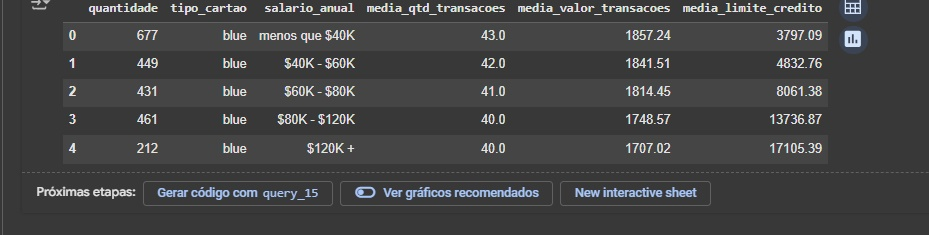

>Nesta análise podemos ver novamente a relação entre o limite de crédito com o tipo de cartão do cliente, sendo que as médias mais baixas de limite são dos clientes que possuem o tipo de cartão blue, aumentando de acordo com a faixa salarial anual. As demais médias de quantidade e valor das transações não possuem relação tão considerável com as variáveis deste resultado.

# Conclusão:

Essas foram algumas das análises extraídas do conjunto de dados, fornecendo insights sobre o perfil dos clientes e seus comportamentos de transação. Resumidamente, destacam-se os seguintes insights:
- A maioria dos clientes possui um salário anual abaixo de $40.000,00, apresentando o tipo de cartão *blue* e limites de crédito mais baixos. Isso indica que a campanha de marketing direcionada a esse grupo específico pode ter um impacto significativo, considerando sua representatividade na base de clientes.
- Ao analisar a variável sexo, observa-se que os clientes do sexo masculino possuem limites máximos de crédito mais elevados em comparação aos clientes do sexo feminino. No entanto, é importante ressaltar que a proporção de clientes masculinos e femininos na base de dados não está equilibrada, o que pode influenciar essa discrepância.
- Verificou-se que os clientes casados são responsáveis pela maior parte das transações, enquanto os clientes divorciados apresentam uma menor participação. Além disso, os clientes divorciados possuem uma média mais alta de valor das transações, sugerindo uma possível relação entre a menor quantidade de transações e seu valor mais elevado.
- Quando analisados por gênero, os clientes solteiros e divorciados do sexo masculino realizaram mais transações em comparação às clientes do sexo feminino. No entanto, a quantidade de transações entre clientes casados é ligeiramente superior. Esses dados destacam a importância de considerar o estado civil e o gênero ao desenvolver estratégias de marketing personalizadas.
- As médias de limite de crédito mais baixas foram encontradas entre os clientes com o tipo de cartão *blue*. Além disso, em cada categoria de tipo de cartão, a média de limite de crédito aumenta de acordo com a faixa salarial anual do cliente. Essa informação pode ser relevante para ajustar as ofertas e comunicações de acordo com o perfil de cada cliente, considerando sua capacidade de gastos.

Esses insights oferecem uma visão mais completa do comportamento dos clientes e podem servir como base para a tomada de decisões estratégicas, permitindo uma segmentação mais eficiente e personalizada dos esforços de marketing.

**Com base nesta análise geral do conjunto de dados, conclui-se que, para uma possível campanha de marketing direcionada aos clientes mais ativos, é recomendado um foco maior nos clientes casados que possuem o tipo de cartão *blue* e apresentam um salário anual abaixo de $40.000,00. Essa estratégia visa otimizar os esforços de marketing, concentrando-se nos segmentos de clientes com maior potencial de resposta e engajamento, permitindo uma alocação mais eficiente dos recursos disponíveis. Ao direcionar a campanha para essa demografia específica, espera-se aumentar a eficácia das ações de marketing e obter resultados mais favoráveis em termos de aquisição e retenção de clientes.**